## Student Performance Indicator

#### Life Cycle of ML Project:
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model

1) Problem Statement: This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation courses. 

2. Data Collection: 

- Source Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the source dataset
df = pd.read_csv("data/student_performance_indicator.csv")

In [3]:
df. head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
df.shape

(1000, 8)

2. Performing some Data Checks on the given dataset
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different columns


In [5]:
#Checing missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no missing values in the dataset

In [6]:
# To check the duplicates in the dataset
dup_records = df.duplicated()
print(f"Total number of duplicate records: {dup_records.sum()}")
df[dup_records]

Total number of duplicate records: 0


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [7]:
# Checking the different unique values of each column in the given dataset
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# Checking the different data types of the columns in the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- In the given dataset, we have 5 object and 3 numeric columns

In [9]:
# Getting the descriptive statistics for the numeric columns: math_score, reading_score and writing_score
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


- Few observations from thwe above descriptive statistics:
1. The mean and 50 percentile value of all the three columns are quite close to each other.
2. While the minimum score for maths is 0 whereas for reading and writing it is 17 and 10 respectively.
3. The standard deviations of the 3 columns are also close as they lie between 14.6 - 15.2.
4. The maximum score for the all the 3 test is 100.


In [10]:
# Checking the counts of Gender values in the dataset
df.gender.value_counts(), df.gender.value_counts(normalize=True)

(gender
 female    518
 male      482
 Name: count, dtype: int64,
 gender
 female    0.518
 male      0.482
 Name: proportion, dtype: float64)

In [11]:
# Checking the value counts of different type of race/ethnicity
df["race_ethnicity"].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [12]:
# Checking the value counts for level of education parents have attained
df["parental_level_of_education"].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [13]:
# Checking the value counts of lunch provided to students before the test
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [14]:
# Checking the value counts for the test preparation course whether it was completed or incomplete before the test
df["test_preparation_course"].value_counts() 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

##### Creating two more columns in the given dataset:
1. Average score of the student(average_score) - (maths+reading+writing)/3
2. Total score of the student(total_score) - (maths+reading+writing)

In [15]:
df["total_score"] = df["math_score"]+df["writing_score"]+df["reading_score"]
df["average_score"] = (df["math_score"]+df["writing_score"]+df["reading_score"])/3
df["average_score"] = df["average_score"].round(2)

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [17]:
# Checking the count of students for scoring 100 and scoring less than equal to 20 marks
individual_score_columns = ["math_score","reading_score","writing_score"]

for col in individual_score_columns:

    marks = 100
    count_col = df[df[col] == marks]["gender"].count()
    subject_name = col.split('_')[0]
    print(f"Number of students with marks {marks} in {subject_name} : {count_col}")

for col in individual_score_columns:

    marks = 20
    count_col = df[df[col] <= marks]["gender"].count()
    subject_name = col.split('_')[0]
    print(f"Number of students with less than and equal to {marks} marks in {subject_name} : {count_col}")

Number of students with marks 100 in math : 7
Number of students with marks 100 in reading : 17
Number of students with marks 100 in writing : 14
Number of students with less than and equal to 20 marks in math : 4
Number of students with less than and equal to 20 marks in reading : 1
Number of students with less than and equal to 20 marks in writing : 3


##### Plotting histograms and Box Plots for the numeric columns

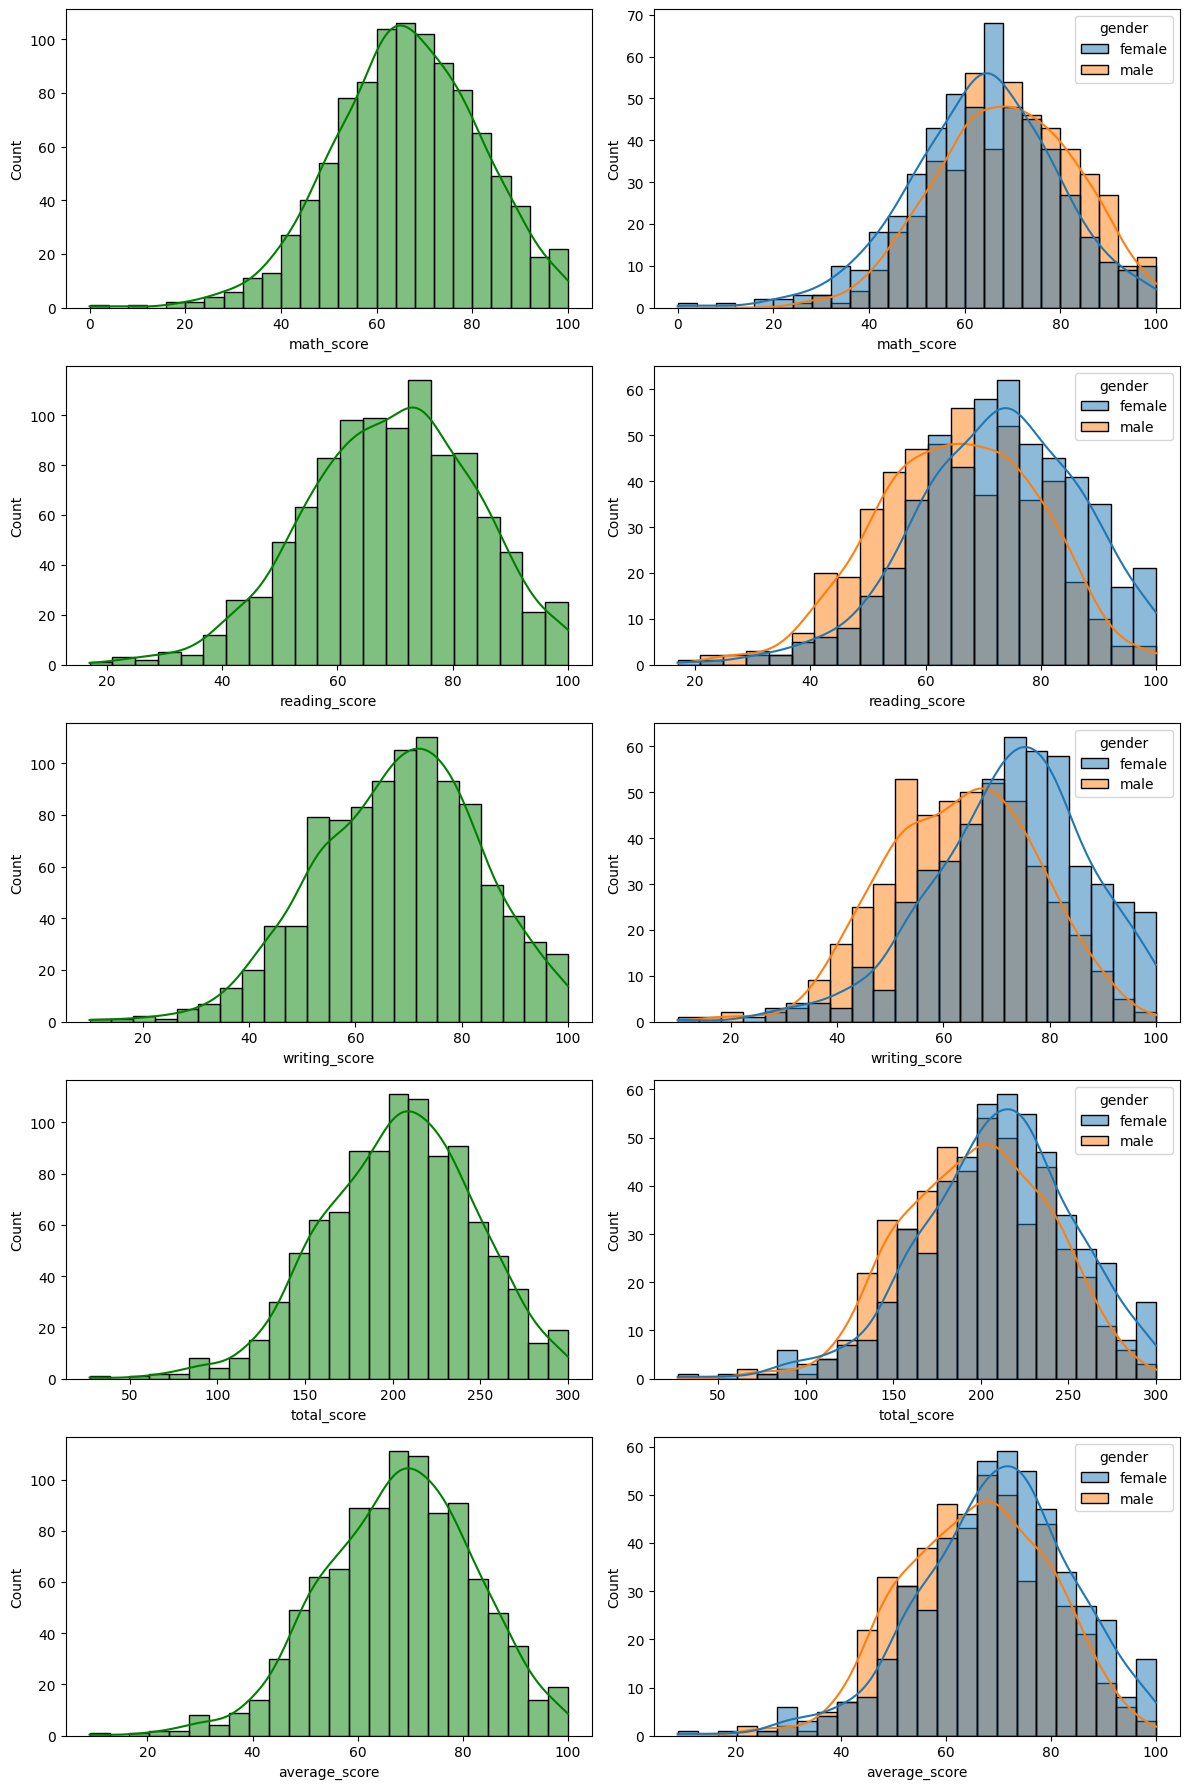

In [18]:
# To plot the Histograms and Boxplots along side for each numeric variable
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 18)

numeric_columns_list = df.select_dtypes(include=['int64','float64']).columns.to_list()


for i in range(len(numeric_columns_list)):
        sns.histplot(data=df, x=df[numeric_columns_list[i]], kde=True, ax=axes[i][0], color='green')
        sns.histplot(data=df, x=df[numeric_columns_list[i]], kde=True, ax=axes[i][1], hue="gender")
        # sns.boxplot(x=df[numeric_columns_list[i]], data=df, ax=axes[i][1], orient="h")
        plt.tight_layout()

- From the above histograms and KDE plot, it can be inferred that female students are performing better in individual subjects and overall as well than male students. 

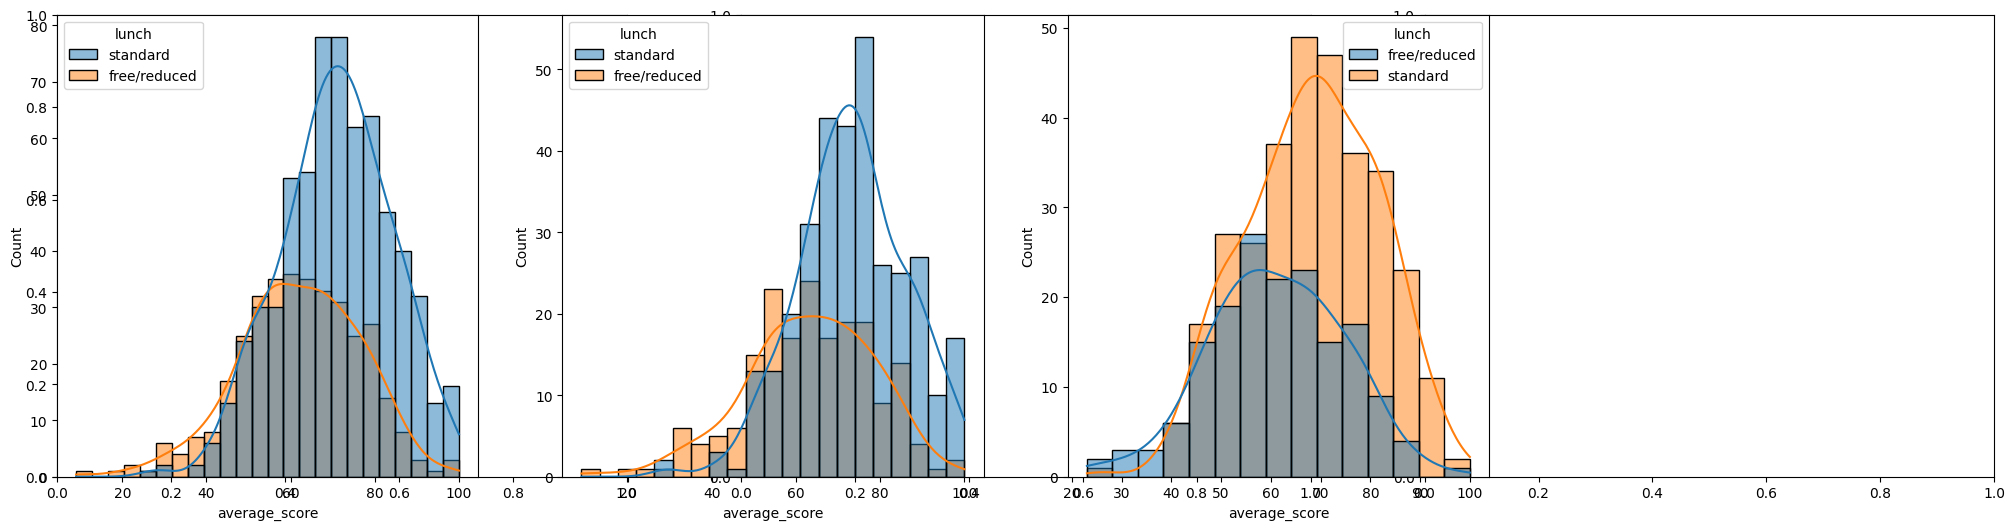

In [19]:
# Plotting the Histogram and KDE PLots for average_score having lunch as hue for different gender
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

- From the above graph, it shows that standard lunch helps perform well in exams for both males and females.

In [20]:
grouping_df = df.groupby(["gender","parental_level_of_education"])["total_score"].agg(["median","count"])
pd.DataFrame(grouping_df).sort_values(by=["gender","median","count"], ascending=False)

median  count
gender parental_level_of_education               
male   master's degree               231.0     23
       associate's degree            206.5    106
       bachelor's degree             204.0     55
       some high school              196.5     88
       some college                  195.5    108
       high school                   187.5    102
female bachelor's degree             221.0     63
       some college                  216.0    118
       associate's degree            214.0    116
       master's degree               213.5     36
       some high school              206.0     91
       high school                   198.0     94

- From the above table, we can onfer the following observations:
1. Parent's whose education is of Master's, Associate's and Bachelor's degree, their male child performs very well in tests.
2. Parent's level of education doesn't affect the overall score of the female students.
3. In both male and female gender, parent's whose level of education is high school shows lowest performance in tests when compared with test scores of children with other parent's education level.

In [21]:
grouping_df = df.groupby(["gender","race_ethnicity"])["total_score"].agg(["median","count"])
pd.DataFrame(grouping_df).sort_values(by=["gender","median","count"], ascending=False)

median  count
gender race_ethnicity               
male   group E          221.0     71
       group D          206.0    133
       group C          194.0    139
       group B          188.5     86
       group A          183.0     53
female group E          220.0     69
       group D          215.0    129
       group C          210.0    180
       group B          203.0    104
       group A          191.0     36

- From the above table, we can infer the following observations:
1. The top to bottom performers in terms of ethnic groups exhibit exact similar behaviour in both male and female genders, in test of 3 subjects.
1. In Male, Group A and B performs poorly in tests as compared to other ethnic groups.
2. In Female, Group A performs poorly in tests when compared with other ethnic groups.
3. Group E shows top performance in both male and female genders.
4. Group D and C remains on second and third place respectively after Group A in both male and female genders, if the median scores are taken into account.

- Below Tables show the median score of individual tests by grouping on gender and race_ethnicity along with their respective counts. 

In [22]:
grouping_df = df.groupby(["gender","race_ethnicity"])["math_score"].agg(["median","count"])
pd.DataFrame(grouping_df).sort_values(by=["gender","median","count"], ascending=False)

median  count
gender race_ethnicity               
male   group E           78.0     71
       group D           71.0    133
       group C           68.0    139
       group B           65.0     86
       group A           63.0     53
female group E           71.0     69
       group D           65.0    129
       group C           63.0    180
       group B           62.0    104
       group A           57.0     36

In [23]:
grouping_df = df.groupby(["gender","race_ethnicity"])["reading_score"].agg(["median","count"])
pd.DataFrame(grouping_df).sort_values(by=["gender","median","count"], ascending=False)

median  count
gender race_ethnicity               
male   group E           73.0     71
       group D           68.0    133
       group C           66.0    139
       group B           62.0     86
       group A           61.0     53
female group E           76.0     69
       group D           74.0    129
       group C           73.0    180
       group B           71.5    104
       group A           67.5     36

In [24]:
grouping_df = df.groupby(["gender","race_ethnicity"])["writing_score"].agg(["median","count"])
pd.DataFrame(grouping_df).sort_values(by=["gender","median","count"], ascending=False)

median  count
gender race_ethnicity               
male   group E           70.0     71
       group D           67.0    133
       group C           62.0    139
       group B           60.0     86
       group A           60.0     53
female group D           76.0    129
       group E           76.0     69
       group C           74.0    180
       group B           71.5    104
       group A           67.0     36